In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
# Read trips text files into pandas dataframe
df_16 = pd.read_csv("/home/student/files/rt_trips_2016_I_DB.txt", sep=';')
df_17 = pd.read_csv("/home/student/files/rt_trips_2017_I_DB.txt", sep=';')

In [3]:
# Concat dataframes into one
df = pd.concat([df_16, df_17], join="inner")

In [7]:
df.head(1)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep
0,09-FEB-16 00:00:00,2824642,145,145_105,2,45668,40800,45375.0,40782.0


In [5]:
# Drop unnecessary columns
df = df.drop(['datasource', 'basin', 'tenderlot', 'suppressed', 'justificationid', 'lastupdate', 'note'], axis=1)

In [8]:
df.head(1)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep
0,09-FEB-16 00:00:00,2824642,145,145_105,2,45668,40800,45375.0,40782.0


/home/student/miniconda3/envs/jeta/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/student/miniconda3/envs/jeta/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


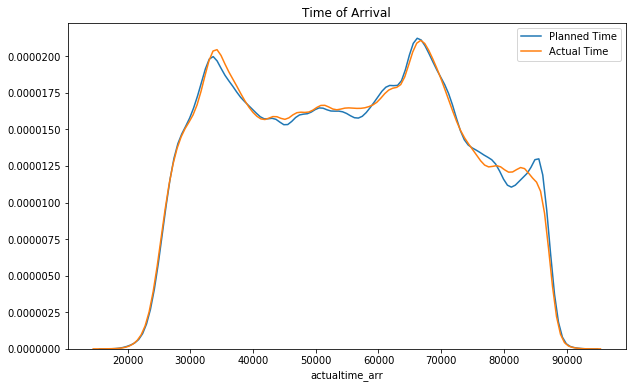

In [11]:
# Chart distribution of arrival times throughout the day for planned and actual.

fig, ax = plt.subplots(figsize=(10, 6))

sns.distplot(df["plannedtime_arr"], hist=False, ax=ax, label="Planned Time")
sns.distplot(df["actualtime_arr"], hist=False, ax=ax, label="Actual Time")

ax.set_title("Time of Arrival")

plt.show()

In [21]:
# Find Correlation between two values:

df[['actualtime_arr', 'plannedtime_arr']].corr().as_matrix()[0,1]

/home/student/miniconda3/envs/jeta/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0.999403274884914

/home/student/miniconda3/envs/jeta/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


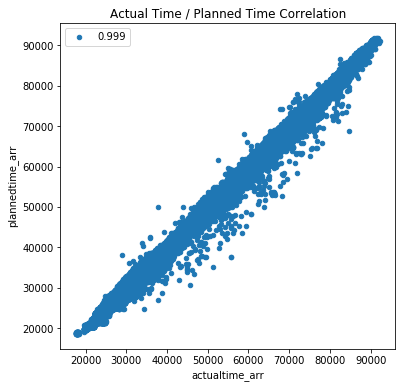

In [19]:
# Plot correlation

fig, ax = plt.subplots(figsize=(6, 6))

df.plot(kind='scatter', x='actualtime_arr', y='plannedtime_arr', 
        label="%.3f" % df[['actualtime_arr', 'plannedtime_arr']].corr().as_matrix()[0,1], 
        title="Actual Time / Planned Time Correlation", ax=ax)

plt.show()

In [15]:
# Regress planned time on actual time to see how closely the two are related

linearModel = sm.ols(formula="actualtime_arr ~ plannedtime_arr", data=df).fit()

In [16]:
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:         actualtime_arr   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.581e+09
Date:                Wed, 27 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:09:37   Log-Likelihood:            -1.4750e+07
No. Observations:             1888388   AIC:                         2.950e+07
Df Residuals:                 1888386   BIC:                         2.950e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         171.3729      1.447    1

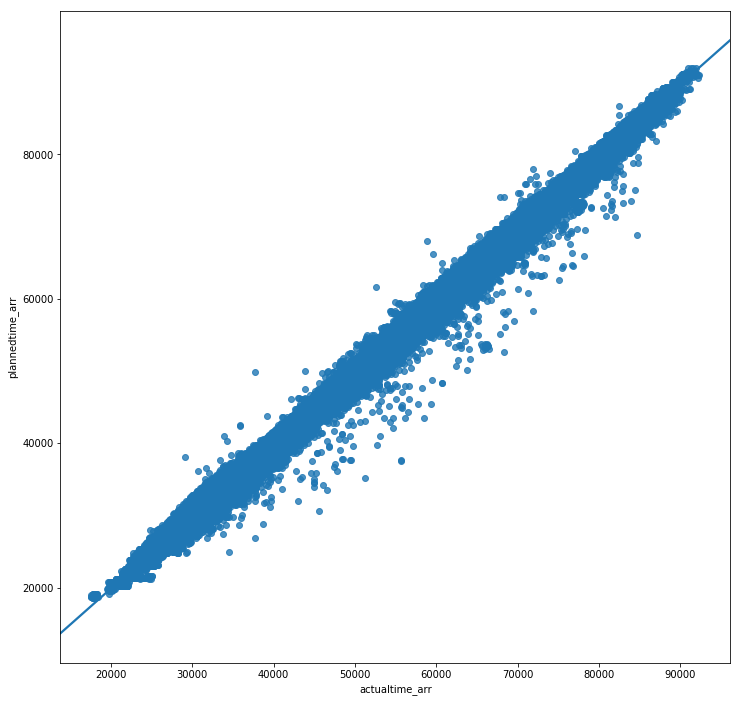

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot data and a linear regression model fit.

fig, ax = plt.subplots(figsize=(12, 12))

sns.regplot(x="actualtime_arr", y="plannedtime_arr", data=df)

plt.show()
plt.savefig("ActualPlannedRegressionModelFit.png")